In [1]:
import pandas as pd
import numpy as np

In [ ]:
dataframe=pd.read_csv(r"../notebook/data/cancer-risk-factors.csv")

In [3]:
dataframe

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium
3,LU0003,Colon,61,0,6,2,2,0,6,2,...,6,4,8,0,0,8,0.318449,32.1,7,Low
4,LU0004,Lung,67,1,10,7,4,0,6,3,...,9,10,9,0,0,5,0.524358,25.1,2,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,ST0395,Colon,60,1,4,6,4,0,10,6,...,4,5,3,1,0,4,0.437539,30.3,3,Medium
1996,ST0396,Prostate,84,1,5,7,8,0,10,0,...,2,1,3,0,0,2,0.451128,25.9,4,Medium
1997,ST0397,Lung,65,0,7,2,10,0,4,2,...,3,6,0,0,1,0,0.295760,22.5,3,Low
1998,ST0398,Lung,64,1,10,2,10,0,2,10,...,5,4,2,0,0,10,0.422201,25.3,3,Medium


In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               2000 non-null   object 
 1   Cancer_Type              2000 non-null   object 
 2   Age                      2000 non-null   int64  
 3   Gender                   2000 non-null   int64  
 4   Smoking                  2000 non-null   int64  
 5   Alcohol_Use              2000 non-null   int64  
 6   Obesity                  2000 non-null   int64  
 7   Family_History           2000 non-null   int64  
 8   Diet_Red_Meat            2000 non-null   int64  
 9   Diet_Salted_Processed    2000 non-null   int64  
 10  Fruit_Veg_Intake         2000 non-null   int64  
 11  Physical_Activity        2000 non-null   int64  
 12  Air_Pollution            2000 non-null   int64  
 13  Occupational_Hazards     2000 non-null   int64  
 14  BRCA_Mutation           

In [7]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [8]:
import seaborn as sns

<Axes: xlabel='Risk_Level', ylabel='count'>

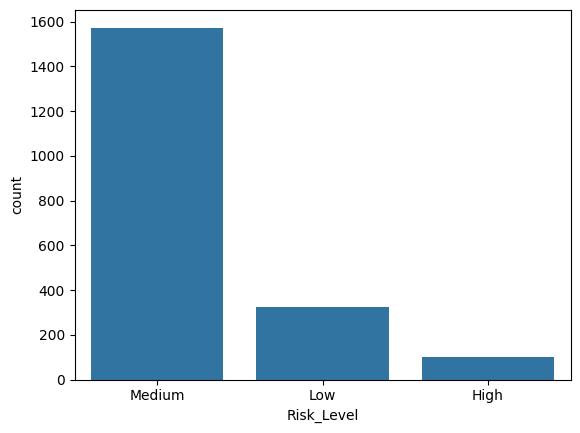

In [28]:
sns.countplot(x='Risk_Level', data=dataframe)

In [12]:
dataframe['Risk_Level'].value_counts()

Risk_Level
Medium    1574
Low        324
High       102
Name: count, dtype: int64

Risk level is Unbalanced

In [16]:
min(dataframe['Age'])

25

the min age is 25 and max age is 90

In [18]:
numerical_cols=[col for col in dataframe.columns if dataframe[col].dtype!='O']
categorical_cols=[col for col in dataframe.columns if dataframe[col].dtype=='O']

In [19]:
print(f"Numerical Columns {numerical_cols}")
print(f"Categorical Columns {categorical_cols}")

Numerical Columns ['Age', 'Gender', 'Smoking', 'Alcohol_Use', 'Obesity', 'Family_History', 'Diet_Red_Meat', 'Diet_Salted_Processed', 'Fruit_Veg_Intake', 'Physical_Activity', 'Air_Pollution', 'Occupational_Hazards', 'BRCA_Mutation', 'H_Pylori_Infection', 'Calcium_Intake', 'Overall_Risk_Score', 'BMI', 'Physical_Activity_Level']
Categorical Columns ['Patient_ID', 'Cancer_Type', 'Risk_Level']


here no need of Patient ID and overall risk score (data leak)

In [21]:
dataframe.drop_duplicates(inplace=True)

In [22]:
dataframe.isna().sum()

Patient_ID                 0
Cancer_Type                0
Age                        0
Gender                     0
Smoking                    0
Alcohol_Use                0
Obesity                    0
Family_History             0
Diet_Red_Meat              0
Diet_Salted_Processed      0
Fruit_Veg_Intake           0
Physical_Activity          0
Air_Pollution              0
Occupational_Hazards       0
BRCA_Mutation              0
H_Pylori_Infection         0
Calcium_Intake             0
Overall_Risk_Score         0
BMI                        0
Physical_Activity_Level    0
Risk_Level                 0
dtype: int64

so no null values are there

In [24]:
max(dataframe['Obesity'])

10

obesity range is 0 to 10

<Axes: xlabel='count', ylabel='Cancer_Type'>

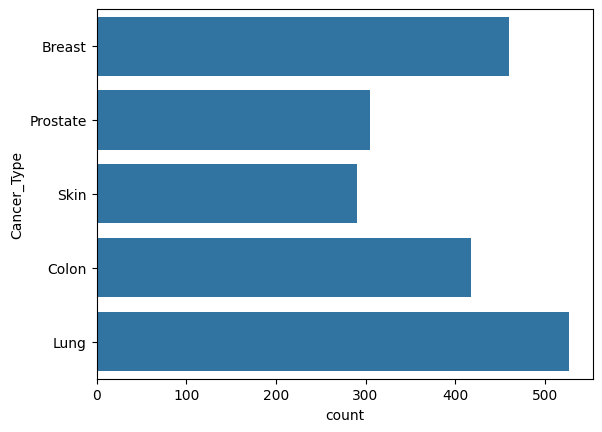

In [ ]:
sns.countplot(y='Cancer_Type', data=dataframe)

In [27]:
dataframe['Cancer_Type'].value_counts()

Cancer_Type
Lung        527
Breast      460
Colon       418
Prostate    305
Skin        290
Name: count, dtype: int64

In [30]:
dataframe.head(3)

,Patient_ID,Cancer_Type,Age,Gender,Smoking,Alcohol_Use,Obesity,Family_History,Diet_Red_Meat,Diet_Salted_Processed,...,Physical_Activity,Air_Pollution,Occupational_Hazards,BRCA_Mutation,H_Pylori_Infection,Calcium_Intake,Overall_Risk_Score,BMI,Physical_Activity_Level,Risk_Level
0,LU0000,Breast,68,0,7,2,8,0,5,3,...,4,6,3,1,0,0,0.398696,28.0,5,Medium
1,LU0001,Prostate,74,1,8,9,8,0,0,3,...,1,3,3,0,0,5,0.424299,25.4,9,Medium
2,LU0002,Skin,55,1,7,10,7,0,3,3,...,1,8,10,0,0,6,0.605082,28.6,2,Medium


are the physical activity and physical activity level same or they are anyways correleted

In [ ]:
dataframe[['Physical_Activity','Physical_Activity_Level']]

,Physical_Activity,Physical_Activity_Level
0,4,5
1,1,9
2,1,2
3,6,7
4,9,2
...,...,...
1995,4,3
1996,2,4
1997,3,3
1998,5,3


In [34]:
dataframe[['Physical_Activity', 'Physical_Activity_Level']].corr()

,Physical_Activity,Physical_Activity_Level
Physical_Activity,1.000000,0.028267
Physical_Activity_Level,0.028267,1.000000


this means that they are not correlated to each other 